In [1]:
# ===========================================
# Titanic Survival Prediction - Full Pipeline
# ===========================================

# --- 1. IMPORT LIBRARIES ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# --- 2. LOAD DATA ---
data_df = pd.read_csv('data/train.csv')
print("\nInitial Data Head:")
data_df.head()


Initial Data Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# --- 3. BASIC INFO ---
print("\nDataset Shape:", data_df.shape)
print("\nInfo:")
print(data_df.info())
print("\nDescribe:")
data_df.describe()


Dataset Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


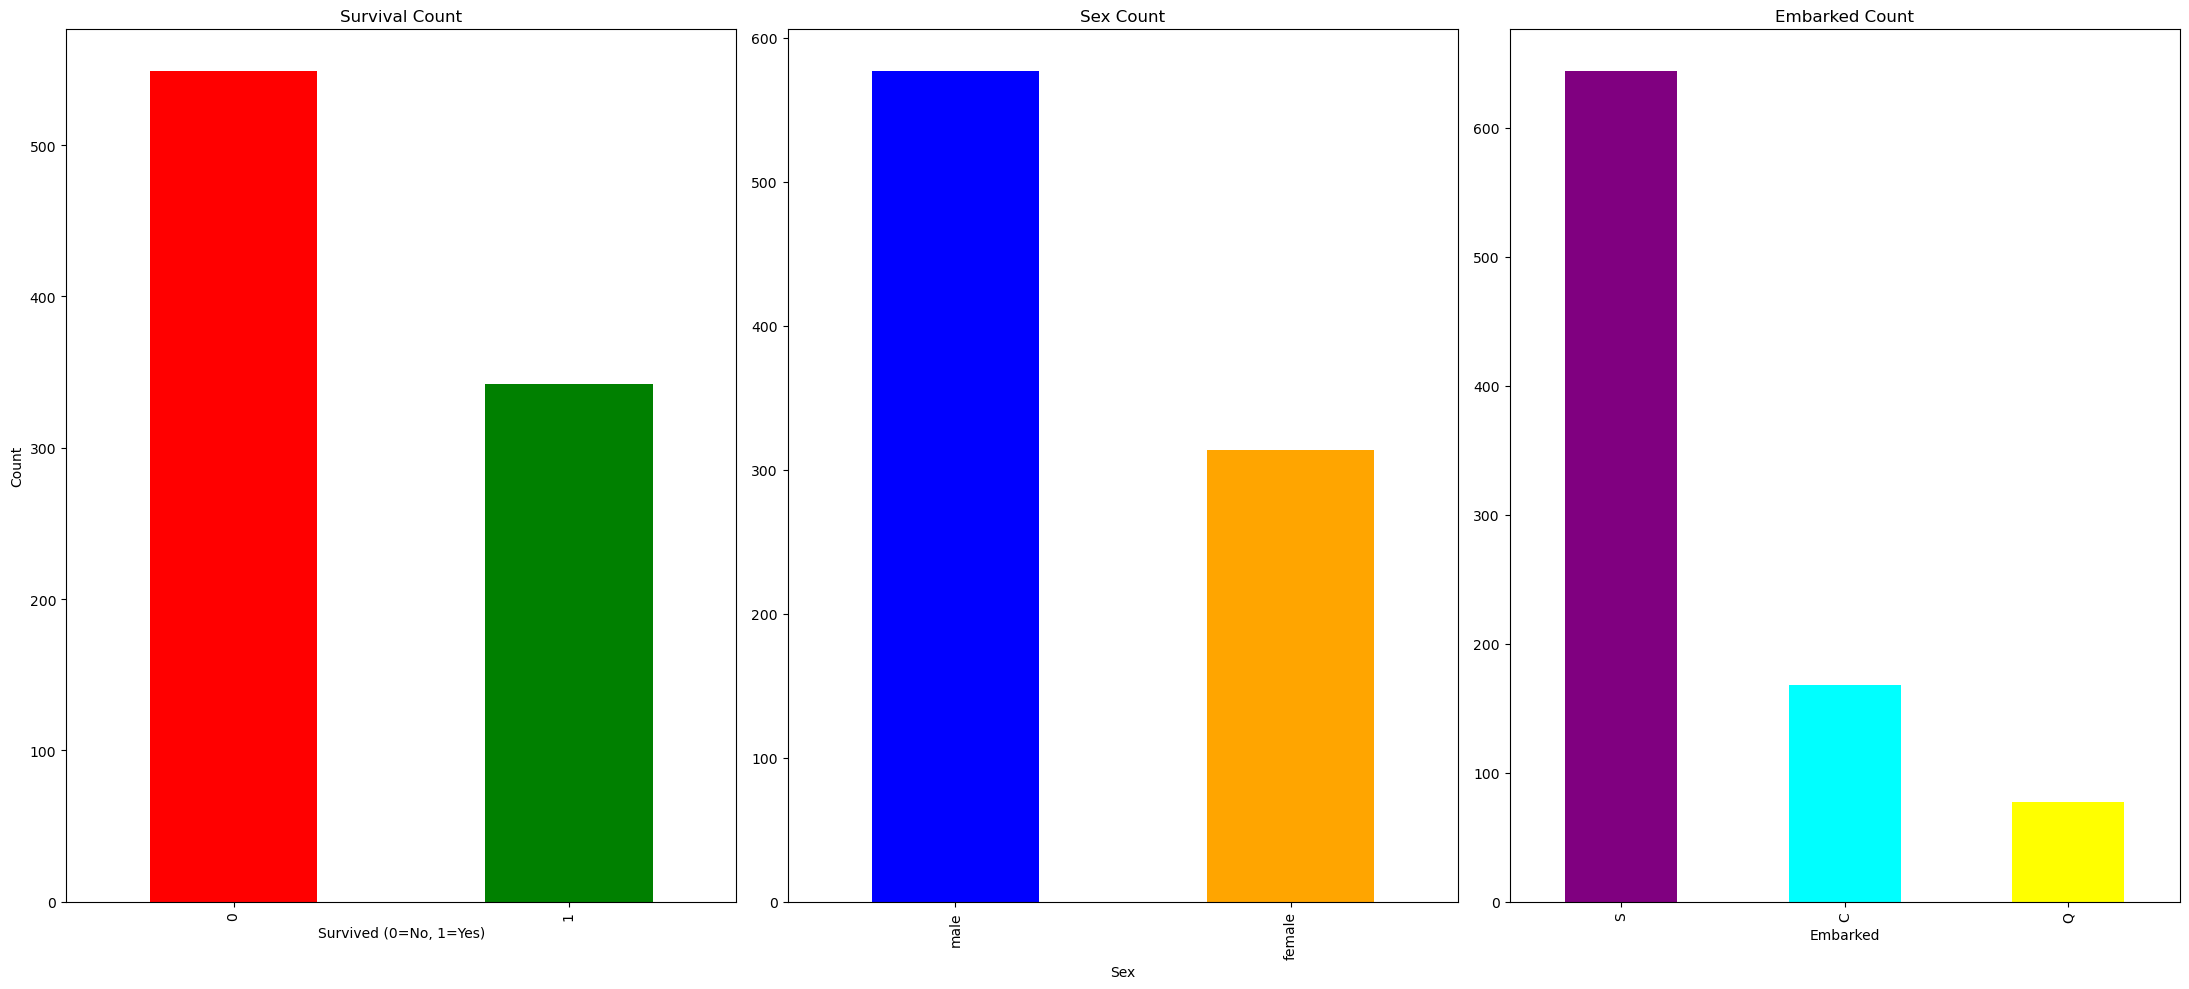

In [3]:
# --- 4. BASIC VISUALIZATIONS ---
fig, ax = plt.subplots(1, 3, figsize=(22, 10))

data_df["Survived"].value_counts().plot(kind="bar", ax=ax[0], color=['red', 'green'])
ax[0].set_title('Survival Count')
ax[0].set_xlabel('Survived (0=No, 1=Yes)')
ax[0].set_ylabel('Count')

data_df["Sex"].value_counts().plot(kind="bar", ax=ax[1], color=['blue', 'orange'])
ax[1].set_title('Sex Count')

data_df["Embarked"].value_counts().plot(kind="bar", ax=ax[2], color=['purple', 'cyan', 'yellow'])
ax[2].set_title('Embarked Count')

plt.tight_layout()
plt.show()

In [4]:
# Drop duplicates based on Name
data_df.drop_duplicates('Name', inplace=True)


In [5]:
# --- 6. FIX STRUCTURAL ERRORS ---
cat_features = ["Sex", "Embarked", "Pclass"]
print("\nUnique values for categorical features:")
for cat_feature in cat_features:
    print(f"{cat_feature}:", data_df[cat_feature].unique())


Unique values for categorical features:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]
Pclass: [3 1 2]


In [6]:

# --- 7. DEAL WITH MISSING DATA ---
print("\nMissing values before cleaning:")
print(data_df.isnull().sum())

# Drop Cabin (too many missing)
data_df.drop("Cabin", axis=1, inplace=True)

# Fill missing 'Embarked' with mode
data_df["Embarked"].fillna(data_df["Embarked"].mode()[0], inplace=True)

# Fill missing 'Age' with mean
data_df["Age"].fillna(data_df["Age"].mean(), inplace=True)

print("\nMissing values after cleaning:")
print(data_df.isnull().sum())

# --- 8. DROP NAME ---
data_df.drop("Name", axis=1, inplace=True)




Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Gifted Gift\AppData\Local\Temp\ipykernel_2036\227040731.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df["Embarked"].fillna(data_df["Embarked"].mode()[0], inplace=True)
C:\Users\Gifted Gift\AppData\Local\Temp\ipykernel_2036\227040731.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [7]:
data_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [8]:
# --- 8. DROP NAME ---
data_df.drop("Ticket", axis=1, inplace=True)



In [9]:
data_df.drop("PassengerId", axis=1, inplace=True)

In [10]:
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# --- 9. ENCODE CATEGORICAL FEATURES ---
LEC_Sex = LabelEncoder()
LEC_Embarked = LabelEncoder()

In [12]:
data_df['Sex'] = LEC_Sex.fit_transform(data_df['Sex'])

In [13]:
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [14]:
data_df['Embarked'] = LEC_Embarked.fit_transform(data_df['Embarked'])

In [15]:
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
# --- 10. DEFINE FEATURES AND TARGET ---
target = 'Survived'
y = data_df[target]
X = data_df.drop(columns=[target])

In [17]:
# --- 11. SPLIT DATA ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (623, 7)  Test shape: (268, 7)


In [19]:
# --- 12. MODEL TRAINING & EVALUATION ---
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if set(y) == {0, 1}:  # Classification metrics
        acc = metrics.accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {acc:.4f}")
        print(metrics.classification_report(y_test, y_pred))
    else:  # Regression metrics
        mse = metrics.mean_squared_error(y_test, y_pred)
        print(f"{model_name} MSE: {mse:.4f}")

In [20]:
# --- 13. LINEAR REGRESSION ---
from sklearn.linear_model import LinearRegression
# evaluate_model(LinearRegression(), "Linear Regression")

In [21]:
# --- 14. LOGISTIC REGRESSION ---
from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")


Logistic Regression Accuracy: 0.8134
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [22]:
# --- 15. DECISION TREE ---
from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree Classifier")

Decision Tree Classifier Accuracy: 0.7388
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       157
           1       0.69      0.67      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [23]:
# --- 16. RANDOM FOREST ---
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest Classifier")

Random Forest Classifier Accuracy: 0.7910
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [24]:
# --- 17. K-NEAREST NEIGHBORS ---
from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")

K-Nearest Neighbors Accuracy: 0.7052
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.53      0.60       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268



In [25]:
# --- 18. SUPPORT VECTOR MACHINE ---
from sklearn.svm import SVC
evaluate_model(SVC(), "Support Vector Classifier")

Support Vector Classifier Accuracy: 0.6567
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       157
           1       0.74      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.69      0.60      0.57       268
weighted avg       0.68      0.66      0.61       268



In [26]:
# --- 19. GRADIENT BOOSTING ---
from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting Classifier")

Gradient Boosting Classifier Accuracy: 0.7985
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       157
           1       0.83      0.65      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:

# --- 20. XGBOOST (if installed) ---
try:
    from xgboost import XGBClassifier
    evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost Classifier")
except ImportError:
    print("XGBoost not installed. Skipping.")

print("\n✅ All models evaluated.")


XGBoost Classifier Accuracy: 0.7687
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.73      0.69      0.71       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268


✅ All models evaluated.


C:\Users\Gifted Gift\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:17:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
import joblib

In [32]:
# 7. Save model and encoders
joblib.dump(LogisticRegression, "best_model.pkl")
joblib.dump(LEC_Sex, "LEC_Sex.pkl")
joblib.dump(LEC_Embarked, "LEC_Embarked.pkl")

print("✅ Model and encoders saved successfully!")

✅ Model and encoders saved successfully!
